### HW3Q6

In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from numpy import linalg as LA
import re

In [2]:
with open('/project2/cmsc25025/beer_review/labeled.json', 'r') as f:
    brv = json.loads(f.read())

In [3]:
beer = pd.DataFrame(brv)
beer.head()

,appearance,aroma,beer_id,beer_name,brewer,overall,palate,review,review_id,style,taste
0,4.0,6.0,45842,John Harvards Simcoe IPA,3084,13.0,3.0,"On tap at the Springfield, PA location. Poured...",0,17,6.0
1,4.0,6.0,45842,John Harvards Simcoe IPA,3084,13.0,4.0,On tap at the John Harvards in Springfield PA....,1,17,7.0
2,4.0,5.0,95213,John Harvards Cristal Pilsner,3084,14.0,3.0,"UPDATED: FEB 19, 2003 Springfield, PA. I've ne...",2,33,6.0
3,2.0,4.0,65957,John Harvards Fancy Lawnmower Beer,3084,8.0,2.0,On tap the Springfield PA location billed as t...,3,33,4.0
4,5.0,8.0,41336,John Harvards Vanilla Black Velvet Stout,3084,16.0,4.0,"Springfield, PA location... Poured an opaque b...",5,58,7.0


In [17]:
beer.shape[0]

2486348

In [4]:
len(beer['beer_name'].unique())

94388

In [5]:
# mean for overall rating by beer
beer.groupby(beer['beer_name'])['overall'].mean()

beer_name
&#268;rni Golf                                         12.000000
&#268ili Kaimo Tikrasis                                10.000000
&#40;Oude&#41; Kwaremont                               12.035714
&rsquo;n Vochtige Droom                                13.000000
10 Barrel Apocalypse IPA                               14.571429
10 Barrel Backdraft IPA                                13.428571
10 Barrel Big Black Stout                              16.000000
10 Barrel Bourbon Bitter                               15.000000
10 Barrel Code 24 Pale Ale                             13.000000
10 Barrel Crosby Farms Harvest Fresh Hop Ale           14.000000
10 Barrel Dubbel Woody                                 16.000000
10 Barrel ISA                                          13.777778
10 Barrel Mike Saw a Sasquatch Session Ale             12.500000
10 Barrel Nightmare on 12th St.                        15.000000
10 Barrel Northwest Red                                14.500000
10 Barrel Orego

In [6]:
# mean for overall rating by brewer
beer.groupby('brewer')['overall'].mean()

brewer
0       12.836224
1       13.251678
2       14.822445
3       13.800000
4       11.640000
5       10.000000
6        9.861111
7        9.206107
8       12.442857
9        9.533333
10      14.141905
11      13.867925
12      14.573460
13      11.000000
14      13.333333
15       6.123473
16      11.900000
17      12.831683
18      14.210934
19      13.358491
20      13.950000
21      12.414429
22      14.584699
23       5.000000
24      12.750000
25       9.135135
26      12.615385
27      11.550617
28      13.200000
29      11.000000
          ...    
7517    14.537500
7518    13.285714
7519    13.731183
7520    11.447154
7521    11.861111
7522    14.125000
7523    11.905983
7524    10.222222
7525    12.874384
7526    12.785714
7527    11.000000
7528    11.936170
7529    13.894737
7530    14.333333
7531    14.333333
7532    12.672794
7533    12.442857
7534    12.000000
7535    13.000000
7536    11.352941
7537    10.903416
7538    13.659341
7539    12.000000
7540    12.723404
754

In [7]:
# median for overall rating by beer
beer.groupby(beer['beer_name'])['overall'].median()

beer_name
&#268;rni Golf                                         12.0
&#268ili Kaimo Tikrasis                                10.0
&#40;Oude&#41; Kwaremont                               12.0
&rsquo;n Vochtige Droom                                13.0
10 Barrel Apocalypse IPA                               15.0
10 Barrel Backdraft IPA                                13.0
10 Barrel Big Black Stout                              16.0
10 Barrel Bourbon Bitter                               15.0
10 Barrel Code 24 Pale Ale                             13.0
10 Barrel Crosby Farms Harvest Fresh Hop Ale           14.0
10 Barrel Dubbel Woody                                 16.0
10 Barrel ISA                                          14.0
10 Barrel Mike Saw a Sasquatch Session Ale             12.0
10 Barrel Nightmare on 12th St.                        15.0
10 Barrel Northwest Red                                14.5
10 Barrel Oregon Brown                                 16.0
10 Barrel Pray for Snow       

In [8]:
# median for overall rating by brewer
beer.groupby(beer['brewer'])['overall'].median()

brewer
0       13.0
1       14.0
2       15.0
3       14.0
4       12.0
5       10.0
6       11.0
7        9.0
8       13.0
9       10.0
10      14.0
11      14.0
12      15.0
13      11.0
14      13.0
15       5.0
16      13.0
17      13.0
18      14.0
19      13.0
20      14.0
21      13.0
22      15.0
23       5.0
24      13.0
25       9.0
26      13.0
27      12.0
28      13.0
29      11.0
        ... 
7517    15.0
7518    14.0
7519    14.0
7520    12.0
7521    12.0
7522    14.0
7523    12.0
7524    11.0
7525    13.0
7526    13.0
7527    11.0
7528    13.0
7529    14.0
7530    13.0
7531    15.0
7532    13.0
7533    13.0
7534    12.0
7535    13.0
7536    12.0
7537    11.0
7538    14.0
7539    12.0
7540    13.0
7541    12.0
7542    15.0
7543    14.0
7544    14.0
7545    12.0
7546    10.0
Name: overall, Length: 7485, dtype: float64

In [9]:
# standard deviation for overall rating by beer
beer.groupby(beer['beer_name'])['overall'].std()

beer_name
&#268;rni Golf                                              NaN
&#268ili Kaimo Tikrasis                                     NaN
&#40;Oude&#41; Kwaremont                               1.971691
&rsquo;n Vochtige Droom                                     NaN
10 Barrel Apocalypse IPA                               1.698534
10 Barrel Backdraft IPA                                1.397276
10 Barrel Big Black Stout                                   NaN
10 Barrel Bourbon Bitter                                    NaN
10 Barrel Code 24 Pale Ale                             1.511858
10 Barrel Crosby Farms Harvest Fresh Hop Ale                NaN
10 Barrel Dubbel Woody                                      NaN
10 Barrel ISA                                          1.262843
10 Barrel Mike Saw a Sasquatch Session Ale             1.000000
10 Barrel Nightmare on 12th St.                        1.414214
10 Barrel Northwest Red                                0.707107
10 Barrel Oregon Brown        

In [10]:
# standard deviation for overall rating by brewer
beer.groupby(beer['brewer'])['overall'].std()

brewer
0       2.545751
1       2.802190
2       2.243593
3       2.949576
4       2.505178
5            NaN
6       4.685252
7       3.175415
8       2.184502
9       3.758166
10      2.223685
11      1.652943
12      2.735385
13      2.828427
14      0.577350
15      4.432520
16      3.510302
17      3.025255
18      2.455317
19      1.755150
20      2.438613
21      2.579429
22      2.293800
23           NaN
24      2.314550
25      4.151052
26      1.444352
27      2.167613
28      0.836660
29           NaN
          ...   
7517    2.657417
7518    2.521882
7519    1.694876
7520    2.554558
7521    2.860098
7522    1.246423
7523    2.766745
7524    2.981424
7525    2.033421
7526    1.805060
7527         NaN
7528    2.130567
7529    1.822536
7530    3.214550
7531    1.759329
7532    1.836368
7533    1.953677
7534    2.198484
7535    1.414214
7536    2.072655
7537    2.548603
7538    3.026622
7539    0.000000
7540    2.104778
7541    2.750757
7542    2.076136
7543    2.545944
7544   

It can be seen that the median and standard deviation of overall rating differ across beer and brewers. The standard deviation for each brewer and beer is not homogeneous -- suggesting that people have different tastes. 

In [4]:
# Part 2: Sentiment analysis
# load the vocabulary 
with open('/project/cmsc25025/beer_review/vocab_50.json', 'r') as f:
    vocab = json.load(f)

In [5]:
# a). generate features 
X = list(beer['review'])
y = list(beer['overall'])
y = [1 if i >= 14 else 0 for i in y]

In [6]:
from scipy.sparse import csr_matrix
from string import punctuation
# create a sparse matrix
def extract_feature(X, vocab):
    # extract features text review given a vacab
    row, col = [], []
    for i in range(len(X)):
        # remove trailing and leading punctuation
        all_words = re.findall(r'\w+', X[i])
        all_words = set([all_words[j].lower() for j in range(len(all_words))])       
        for word in all_words: 
            if word in vocab:
                row.append(i)
                col.append(vocab[word])
    data = np.ones(len(row), dtype=np.int32)
    mat = csr_matrix((data, (row, col)), shape=(len(X), len(vocab)))
    return mat

In [7]:
mat = extract_feature(X, vocab)

In [8]:
# remove all-zero rows
index = mat.sum(1).nonzero()[0]
X = [X[i] for i in index]
y = [y[i] for i in index]

In [9]:
# create features from vocabulary 
X = extract_feature(X, vocab)

In [10]:
# test-train sample split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                    y, test_size=0.3, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,
                    y_test, test_size=0.5, random_state=0)

In [11]:
# Logistic regression using Newton’s method
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
def select_regularization(X, y, lambs):    
    # initialize mse sets 
    err = np.zeros(len(lambs))
    for i in range(len(lambs)):
        clf = LogisticRegression(penalty='l2', solver='lbfgs', 
            max_iter=1000, random_state=0, C=1/lambs[i]).fit(X, y)
        err[i] = np.mean((clf.predict(X) != y))
        print('Error Rate for lambda = {}: '.format(lambs[i]
                                            ), round(err[i],6))
    return err

In [12]:
err = select_regularization(X_valid, y_valid, lambs)

Error Rate for lambda = 0.001:  0.182967
Error Rate for lambda = 0.01:  0.182967
Error Rate for lambda = 0.1:  0.183394
Error Rate for lambda = 1:  0.187998
Error Rate for lambda = 10:  0.199925


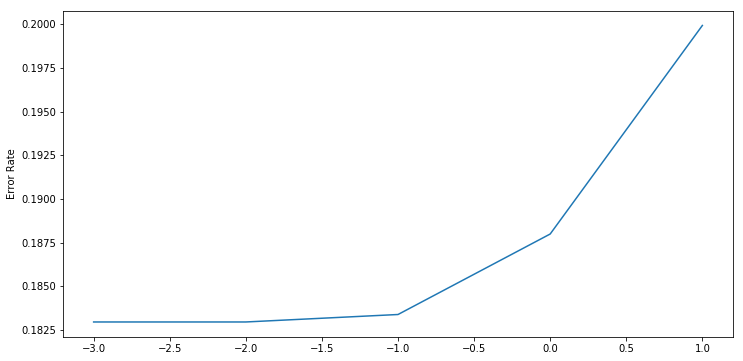

In [21]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.log10(lambs), err)
plt.ylabel('Error Rate')
plt.show()

In [15]:
# performance on test set
clf = LogisticRegression(penalty='l2', solver='lbfgs', 
    max_iter=1000, random_state=0, C=1/0.001).fit(X_train, y_train)
er = np.mean((clf.predict(X_test) != y_test))
print('Error Rate for lambda = {}: '.format(0.001), round(er,6))

Error Rate for lambda = 0.001:  0.210659


In [48]:
# fit with SVC
from sklearn.svm import LinearSVC
def select_regularization_svc(X, y, lambs):    
    # initialize mse sets 
    err = np.zeros(len(lambs))
    for i in range(len(lambs)):
        clf = LinearSVC(penalty='l2', random_state=0, 
            loss='hinge', C=1/lambs[i]).fit(X, y)
        err[i] = np.mean(clf.predict(X) != y)
        print('Error Rate for lambda = {}: '.format(lambs[i]
                                    ), round(err[i],6))
    return err

In [52]:
lambs = [0.001, 0.01, 0.1, 1, 10]
err_svc = select_regularization_svc(X_valid, y_valid, lambs)

Error Rate for lambda = 0.001:  0.284373
Error Rate for lambda = 0.01:  0.255797
Error Rate for lambda = 0.1:  0.179502
Error Rate for lambda = 1:  0.182524
Error Rate for lambda = 10:  0.193943


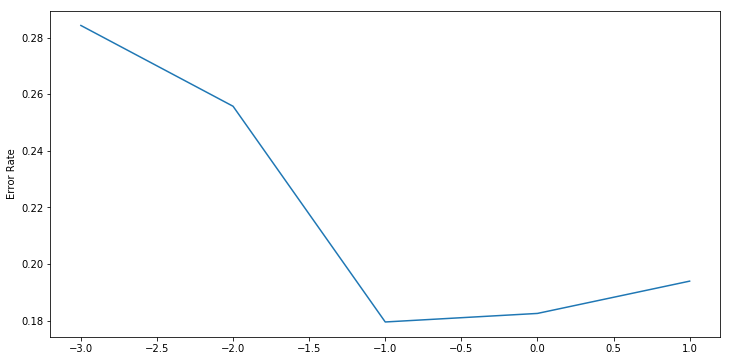

In [20]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.log10(lambs), err_svc)
plt.ylabel('Error Rate')
plt.show()

In [19]:
# performance on test set
clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, 
                         random_state=0, C=1/0.1).fit(X_train, y_train)
er_svc = np.mean((clf.predict(X_test) != y_test))
print('Error Rate for lambda = {}: '.format(0.1), round(er_svc,6))

Error Rate for lambda = 0.1:  0.210307


In general, error rate for validation set is lower for applying the logistic regression than applying SVM. However, the error rate for test set does not differ much for the two measures.

In [22]:
# Stochastic gradient descent
# i. Initialize the model with θ = 0 (uniform).
# ii. Randomly split the training data into mini-batches. Make one pass of the data, processing
# one mini-batch in every iteration. This is called one training epoch
# iii. Repeat the last step a few times.

In [23]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [44]:
# loss function for logistic regression : 
# L = -(y*log(1/(1+exp(-theta*x))) + (1-y)*log(1/(1+exp(theta*x))))
# gradient G = - (y - 1/(1 + exp(-theta*x)))*x
def sgd(X, y, n_batches, learning_rate, lamb, max_epoch, decay, max_iter):
    y = np.array(y).reshape((len(y), 1))
    # initialize theta 
    theta = np.zeros((X.shape[1], 1))
    t, epoch = 0, 0
    diverge = True
    while epoch <= max_epoch and diverge:
        batch = 0
        epoch += 1
        # divide into mini-batches
        kf = KFold(n_splits=n_batches, shuffle=True)
        for train_index, test_index in kf.split(X):
            batch += 1
            t += 1
            X_train = X[test_index,: ]
            y_train = y[test_index]
            # make prediction
            eta = X_train@theta
            h = sigmoid(eta)
            # update theta
            G = (X_train.T)@(y_train - h)/y_train.shape[0] - lamb*theta
            # apply a L2 regularization
            old_theta = theta 
            theta = theta + learning_rate* G
            # update learning rate
            learning_rate = learning_rate * decay
            if LA.norm(old_theta - theta) < 10**(-4):
                diverge = False
                break
            if t >= max_iter:
                break
        if t >= max_iter:
            break           
    #print('Iteration:{}'.format(t))
    return theta

In [40]:
def select_model(X, y, n_batches, learning_rate, lambs, decay):
    # initialize mse sets 
    for i in range(len(lambs)):
        theta = sgd(X, y, n_batches, learning_rate, lambs[i], 100, decay, 10000)
        # make prediction
        eta = X.dot(theta)  
        h = sigmoid(eta)       
        y_pred = np.array([1 if h[i] >= 0.5 else 0 for i in range(len(y))]) 
        print('Error Rate for lambda = {}: '.format(lambs[i]), 
              round(np.mean(y_pred != y),6))

In [41]:
# split data
X_tr, X_te, y_tr, y_te = train_test_split(X[:10000,:], y[:10000] ,
                        test_size=0.3, random_state=0)
X_val, X_te, y_val, y_te = train_test_split(X_te,
                        y_te, test_size=0.5, random_state=0)

##### Decreasing Rate, Learning Rate = 10

In [65]:
lambs = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
select_model(X_val, y_val, 100, 0.05, lambs, 0.9)

Error Rate for lambda = 0.0001:  0.278
Error Rate for lambda = 0.0005:  0.281333
Error Rate for lambda = 0.001:  0.282
Error Rate for lambda = 0.005:  0.281333
Error Rate for lambda = 0.01:  0.262667
Error Rate for lambda = 0.05:  0.283333
Error Rate for lambda = 0.1:  0.281333


Since applying fixed rate is harder to satisfy the stopping criterion (norm of changes in theta after each iteration). In my experiment, after 100 iteration for the whole data set, none of the cases converges. The error rate increases fast as lambda increases. In addition to this, training the model takes much longer if we apply the fixed rate compared to a decreasing rate (run time not reported here). Hence, in the following part, I use decreasing rate with lambda = 0.01. 

In [63]:
def plot_iteration(X, y):
    loss = np.zeros(100)
    for i in range(100):
        theta = sgd(X, y, 100, 0.05, 0.01, 100, 0.9, i)
        y = np.array(y)
        # make prediction
        eta = X@theta
        h = sigmoid(eta)
        log_h = np.log(h)
        # calculate loss function
        l = np.sum(y*log_h + (1-y)*(1- log_h))
        loss[i] = l
    fig = plt.figure(figsize=(6,4))
    plt.plot(list(range(100)), loss)
    plt.ylabel('Negative Loss')
    plt.show()
    return loss   

##### plot loss function as number of iteration on validation set

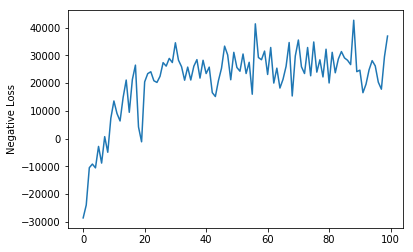

In [66]:
l = plot_iteration(X_val, y_val)

##### plot loss function as number of iteration on training set

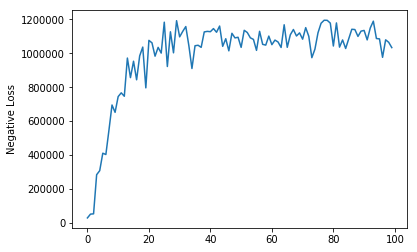

In [67]:
l_t = plot_iteration(X_tr, y_tr)

In [68]:
def predict(X_tr, y_tr, X_te, y_te,n_batches):
    theta = sgd(X_tr, y_tr, n_batches, 0.05, 0.01, 100, 0.9, 1000)
    # make prediction
    eta = X_te.dot(theta)  
    h = sigmoid(eta)       
    y_pred = np.array([1 if h[i] >= 0.5 else 0 for i in range(len(y_te))]) 
    print('Error Rate for lambda = {}: '.format(0.01), 
          round(np.mean(y_pred != y_te),6))

#### error rate on test set

In [224]:
predict(X_tr, y_tr, X_te, y_te, 100)

Error Rate for lambda = 0.01:  0.21


In [70]:
# Part 3: Scores versus text
Xs= beer[['appearance', 'aroma', 'palate', 'style', 'taste']][:10000]
Xs = np.array(Xs).reshape((10000, 5))
# split data
Xs_tr, Xs_te = train_test_split(Xs, test_size=0.3, random_state=0)
Xs_val, Xs_te = train_test_split(Xs_te, test_size=0.5, random_state=0)

##### plot loss function as number of iteration on validation set

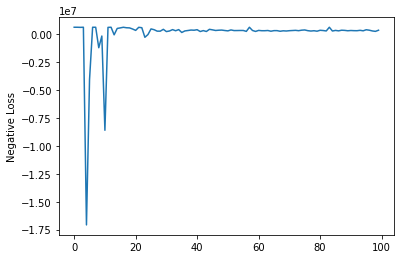

In [71]:
ls = plot_iteration(Xs_val, y_val)

##### plot loss function as number of iteration on training set

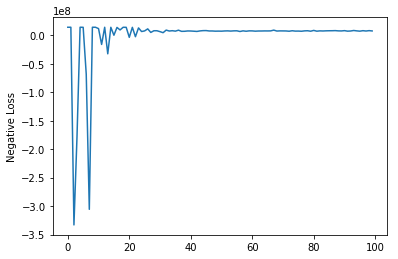

In [72]:
ls_t = plot_iteration(Xs_tr, y_tr)

#### error rate on test set

In [225]:
predict(Xs_tr, y_tr, Xs_te, y_te, 100)

Error Rate for lambda = 0.01:  0.248


It can be seen that the prediction using all reviews is better than using other score data. It suggests that reviews might contain more information than the score data. Given the feature we extracted from review data consists of 30000+ dimensions, it makes sense that prediction based on this high dimensional data is better. 